# Import Libraries
You can import all the libraries required here or you can import the libraries wherever you require on the go.

In [1]:
# Importing libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset
Load the required train or test datasets here.

In [2]:
# Loading training data

path = 'C:\\Users\\felip\\OneDrive - Universidade Federal de Pernambuco\\Python\\DPHI Iniciação em Data Science\\Train_data.csv'
insurance_df = pd.read_csv(path)
insurance_df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


# Exploratory Data Analysis (EDA)
Perform all the exploratory data analysis steps here.

In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

#### 3102 entries and 17 features 
#### Some categorical features have null values

In [4]:
insurance_df['car_insurance'].value_counts() 

1    1760
0    1342
Name: car_insurance, dtype: int64

In [15]:
print(f'There are 1760 people who bought the car insurance, or {(1760/(1760 + 1342))*100:.2f} %.')
print(f'And 1342 people who did not buy car insurance, or {(1342/(1760 + 1342))*100:.2f} %.')

There are 1760 people who bought the car insurance, or 56.74 %.
And 1342 people who did not buy car insurance, or 43.26 %.


# Data Cleaning and Data Preprocessing
Perform all the data cleaning and data preprocessing steps here.

In [5]:
insurance_df['job_type'].value_counts()

management       724
blue-collar      544
technician       526
admin.           346
services         231
retired          193
unemployed       146
student          119
self-employed    106
housemaid         80
entrepreneur      76
Name: job_type, dtype: int64

In [6]:
# handling NaN values in dataframe
insurance_df['job_type'] = insurance_df['job_type'].fillna('management')
insurance_df['education_level'] = insurance_df['education_level'].fillna('secondary')
insurance_df['communication'] = insurance_df['communication'].fillna('cellular')

In [7]:
# Too much null values, better to del this collumn.
del insurance_df['Outcome']

In [21]:
# Handling date data, firstly transforming the type of the columns to datetime type
insurance_df['call_start'] = pd.to_datetime(insurance_df['call_start'])
insurance_df['call_end'] = pd.to_datetime(insurance_df['call_end'])
# Creating a new column relative to the time of the call
insurance_df['calltime'] = insurance_df['call_end'] - insurance_df['call_start']

# transforming the time to seconds
time = []
for val in insurance_df['calltime']:
    time.append(val.seconds)

# assigning the values of times list to the new column created in dataframe
insurance_df['calltime'] = time
del insurance_df['call_start'] # deleting old columns relative to the start and end of the call
del insurance_df['call_end']

In [22]:
insurance_df.head(1) 

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,car_insurance,calltime
0,47.0,blue-collar,married,primary,0,1112.0,1,0,cellular,13,may,1,-1,0,0,129


In [23]:
cat_cols = ['default_or_not', 'household_insurance', 'car_loan'] # Category columns to transform in object type
for values in cat_cols:
    insurance_df[cat_cols] = insurance_df[cat_cols].astype('object')

cat_cols_total = insurance_df.select_dtypes(include = 'object').columns # selectin object columns in dataframe
insurance_df = pd.get_dummies(insurance_df, columns=cat_cols_total) # getting dummies
insurance_df.head(1)

,age,balance_amt,last_contact_day,no_of_contacts,days_passed,prev_attempts,car_insurance,calltime,job_type_admin.,job_type_blue-collar,...,last_contact_month_dec,last_contact_month_feb,last_contact_month_jan,last_contact_month_jul,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep
0,47.0,1112.0,13,1,-1,0,0,129,0,1,...,0,0,0,0,0,0,1,0,0,0


In [25]:
# splitting the data in dependet variables and independent variable.
X = insurance_df.drop(columns = ['car_insurance'])
y = insurance_df['car_insurance']

# running the train_test_split to construc the train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=5)

# Build Machine Learning Model & Evaluate it
Build your all the machine learning model and check their performance on the validation dataset (i.e. the test dataset that you splitted using ***train_test_split***) here.

### Building a Random Forest model
##### (I tried a Logistic Regression Model, but Random Forest had the best performance)

In [29]:
# Importing RandomForestClassifier from sklearn.ensemble

from sklearn.ensemble import RandomForestClassifier

### Hyper parameter tunning

In [35]:
# Different parameters in random forest

criterion = ['gini', 'entropy']        # what criteria to consider

n_estimators = [100, 200, 300]       # Number of trees in random forest

max_features = ['auto', 'sqrt']       # Number of features to consider at every split

max_depth = [10, 20]      # Maximum number of levels in tree. Hope you remember linspace function from numpy session

max_depth.append(None)     # also appendin 'None' in max_depth i.e. no maximum depth to be considered.

params = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}
params

{'criterion': ['gini', 'entropy'],
 'n_estimators': [100, 200, 300],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, None]}

In [33]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(rfc, param_grid=params, n_jobs=2)
gs.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 200, 300]})

In [34]:
gs.best_params_ # The best parameters to put into the model

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 300}

In [37]:
# Loading the model with the best parameters
rfc = RandomForestClassifier(criterion='entropy', max_depth=None, max_features='auto', n_estimators=300) 

In [38]:
# fitting training data
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [39]:
# Looking to the performance of the model using internal test dataset
rfc.score(X_test, y_test)

0.873046875

In [40]:
# creating a variable with the predicted data
y_pred = rfc.predict(X_test)

<AxesSubplot:>

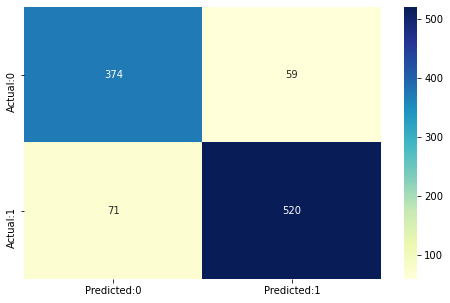

In [41]:
# The Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_m = confusion_matrix(y_test,y_pred)
conf_matrix = pd.DataFrame(data=confusion_m, columns=['Predicted:0', 'Predicted:1'], index=['Actual:0', 'Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu")

In [42]:
# creating variables with each entrie of the confusion matrix
TN = confusion_m[0, 0]
TP = confusion_m[1, 1]
FN = confusion_m[1, 0]
FP = confusion_m[0, 1]
sensitivity = TP/float(TP + FN)
specificity = TN/float(TN + FP)

In [43]:
print('The acuuracy of the model = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN))

The acuuracy of the model = TP+TN/(TP+TN+FP+FN) =  0.873046875


# Prediction for Test Dataset (Provided by DPhi)
Predict if the customer would buy the car insurance or not on the test data provided by DPhi here.


In [44]:
# In this section I will do all the steps to handle with the train data
path2 = 'C:\\Users\\felip\\OneDrive - Universidade Federal de Pernambuco\\Python\\DPHI Iniciação em Data Science\\Test_data.csv'
new_test_data = pd.read_csv(path2)
new_test_data.head(1)

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.0,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56


In [45]:
new_test_data['job_type'] = new_test_data['job_type'].fillna('management')
new_test_data['education_level'] = new_test_data['education_level'].fillna('secondary')
new_test_data['communication'] = new_test_data['communication'].fillna('cellular')
del new_test_data['Outcome']
new_test_data['call_start'] = pd.to_datetime(new_test_data['call_start'])
new_test_data['call_end'] = pd.to_datetime(new_test_data['call_end'])
new_test_data['calltime'] = new_test_data['call_end'] - new_test_data['call_start']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   age                  935 non-null    float64        
 1   job_type             935 non-null    object         
 2   marital_status       935 non-null    object         
 3   education_level      935 non-null    object         
 4   default_or_not       935 non-null    int64          
 5   balance_amt          935 non-null    float64        
 6   household_insurance  935 non-null    int64          
 7   car_loan             935 non-null    int64          
 8   communication        935 non-null    object         
 9   last_contact_day     935 non-null    int64          
 10  last_contact_month   935 non-null    object         
 11  no_of_contacts       935 non-null    int64          
 12  days_passed          935 non-null    int64          
 13  prev_attempts       

In [47]:
time2 = []
for val in new_test_data['calltime']:
    time2.append(val.seconds)

new_test_data['calltime'] = time2
del new_test_data['call_start']
del new_test_data['call_end']
new_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  935 non-null    float64
 1   job_type             935 non-null    object 
 2   marital_status       935 non-null    object 
 3   education_level      935 non-null    object 
 4   default_or_not       935 non-null    int64  
 5   balance_amt          935 non-null    float64
 6   household_insurance  935 non-null    int64  
 7   car_loan             935 non-null    int64  
 8   communication        935 non-null    object 
 9   last_contact_day     935 non-null    int64  
 10  last_contact_month   935 non-null    object 
 11  no_of_contacts       935 non-null    int64  
 12  days_passed          935 non-null    int64  
 13  prev_attempts        935 non-null    int64  
 14  calltime             935 non-null    int64  
dtypes: float64(2), int64(8), object(5)
memor

In [48]:
cat_cols = ['default_or_not', 'household_insurance', 'car_loan']
for values in cat_cols:
    new_test_data[cat_cols] = new_test_data[cat_cols].astype('object')
    
cat_cols_total = new_test_data.select_dtypes(include = 'object').columns
new_test_data = pd.get_dummies(new_test_data, columns=cat_cols_total)
new_test_data.head(1)

,age,balance_amt,last_contact_day,no_of_contacts,days_passed,prev_attempts,calltime,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,...,last_contact_month_dec,last_contact_month_feb,last_contact_month_jan,last_contact_month_jul,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep
0,65.0,20806.0,8,2,-1,0,523,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
predictions = rfc.predict(new_test_data)

# Saving Prediction File

### Save prediciton results locally via jupyter notebook
If you are working on Jupyter notebook, execute below block of codes. A file named 'prediction_results.csv' will be created in your current working directory.

In [50]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = new_test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)      # the csv file will be saved locally on the same location where this notebook is located.